In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('data.csv')
df.head()

,order_id,customers,city,state,order_date,total_units,revenue,product_name,category_name,brand_name,store_name,sales_rep
0,1,Johnathan Velazquez,Pleasanton,CA,1/1/2016 0:00,2,1199.98,Electra Townie Original 7D EQ - 2016,Cruisers Bicycles,Electra,Santa Cruz Bikes,Mireya Copeland
1,1,Johnathan Velazquez,Pleasanton,CA,1/1/2016 0:00,1,599.99,Electra Townie Original 7D EQ - Women's - 2016,Cruisers Bicycles,Electra,Santa Cruz Bikes,Mireya Copeland
2,1,Johnathan Velazquez,Pleasanton,CA,1/1/2016 0:00,2,3098.00,Surly Straggler - 2016,Cyclocross Bicycles,Surly,Santa Cruz Bikes,Mireya Copeland
3,1,Johnathan Velazquez,Pleasanton,CA,1/1/2016 0:00,1,2899.99,Trek Fuel EX 8 29 - 2016,Mountain Bikes,Trek,Santa Cruz Bikes,Mireya Copeland
4,1,Johnathan Velazquez,Pleasanton,CA,1/1/2016 0:00,2,3599.98,Trek Remedy 29 Carbon Frameset - 2016,Mountain Bikes,Trek,Santa Cruz Bikes,Mireya Copeland


#### Add Year Column

In [3]:
df["order_date"] = pd.to_datetime(df["order_date"], yearfirst=True) #Year first
df["Year"] = df["order_date"].astype(str) #Turn year column to string
df["Year"] = df["Year"].str[0:4]
df["Month"] = df["order_date"].astype(str)
df["Month"] = df["Month"].str[5:7]
df.head(5)

,order_id,customers,city,state,order_date,total_units,revenue,product_name,category_name,brand_name,store_name,sales_rep,Year,Month
0,1,Johnathan Velazquez,Pleasanton,CA,2016-01-01,2,1199.98,Electra Townie Original 7D EQ - 2016,Cruisers Bicycles,Electra,Santa Cruz Bikes,Mireya Copeland,2016,01
1,1,Johnathan Velazquez,Pleasanton,CA,2016-01-01,1,599.99,Electra Townie Original 7D EQ - Women's - 2016,Cruisers Bicycles,Electra,Santa Cruz Bikes,Mireya Copeland,2016,01
2,1,Johnathan Velazquez,Pleasanton,CA,2016-01-01,2,3098.00,Surly Straggler - 2016,Cyclocross Bicycles,Surly,Santa Cruz Bikes,Mireya Copeland,2016,01
3,1,Johnathan Velazquez,Pleasanton,CA,2016-01-01,1,2899.99,Trek Fuel EX 8 29 - 2016,Mountain Bikes,Trek,Santa Cruz Bikes,Mireya Copeland,2016,01
4,1,Johnathan Velazquez,Pleasanton,CA,2016-01-01,2,3599.98,Trek Remedy 29 Carbon Frameset - 2016,Mountain Bikes,Trek,Santa Cruz Bikes,Mireya Copeland,2016,01


### Question 1: What was the best year for revenue? How much was earned that year?

In [4]:
df.groupby("Year").sum()

,order_id,total_units,revenue
Year,,,
2016,560263,2663,2709484.47
2017,2026871,3099,3845515.02
2018,1290881,1316,2023989.39


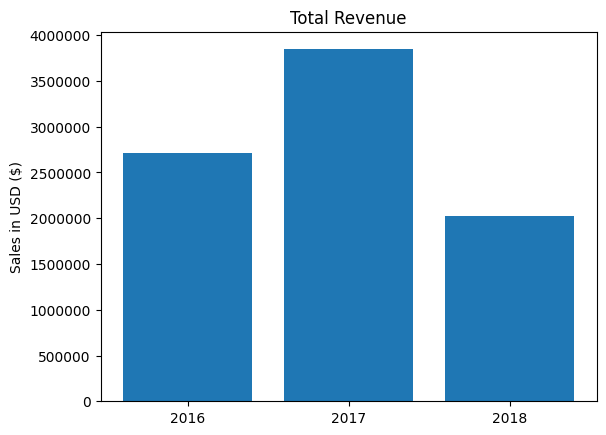

In [19]:
yearResults = df.groupby("Year").sum()
Years = df["Year"].unique()

plt.ticklabel_format(style='plain') # gets rid of scientific notation
plt.bar(Years, yearResults["revenue"])
plt.ylabel("Sales in USD ($)")
plt.title("Total Revenue")
plt.show()

### Question 2: What was the best month for revenue? How much was earned that month?

In [6]:
df.groupby("Month").sum()

,order_id,total_units,revenue
Month,,,
01,325783,691,984440.64
02,284478,646,748450.01
03,453843,799,957035.47
04,753030,1004,1350508.59
05,178394,465,526455.79
06,221308,496,651222.35
07,227767,471,491531.73
08,276871,547,585941.06
09,262216,522,642621.25


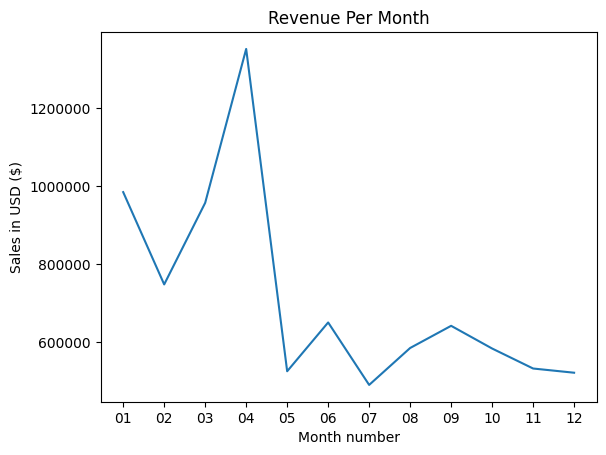

In [21]:
monthResults = df.groupby("Month").sum()
Months = df["Month"].unique()

plt.ticklabel_format(style='plain') # gets rid of scientific notation
plt.plot(Months, monthResults["revenue"])
plt.xlabel("Month number")
plt.ylabel("Sales in USD ($)")
plt.title("Revenue Per Month")
plt.show()

In [8]:
df.pivot_table(index='Month', columns='Year', values='revenue', fill_value= 0, aggfunc='sum')

Year,2016,2017,2018
Month,,,
01,241184.15,316954.77,426301.72
02,175768.10,348740.47,223941.44
03,202157.14,348177.13,406701.20
04,187223.55,254105.57,909179.47
05,228701.13,297754.66,0.00
06,231120.29,419892.07,209.99
07,222854.21,255727.63,12949.89
08,253130.83,322553.32,10256.91
09,303282.61,329388.68,9949.96


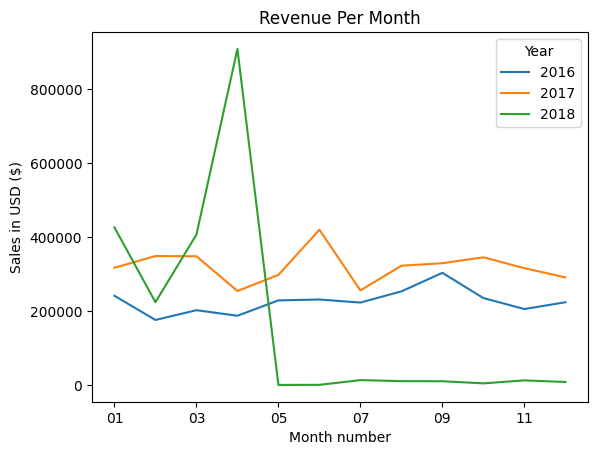

In [9]:
monthYearResults = df.pivot_table(index='Month', columns='Year', values='revenue', fill_value= 0, aggfunc='sum')
monthYearResults.plot()

plt.xlabel("Month number")
plt.ylabel("Sales in USD ($)")
plt.title("Revenue Per Month")
plt.show()

### Question 3: Which state earned the most revenue? How much was earned? 

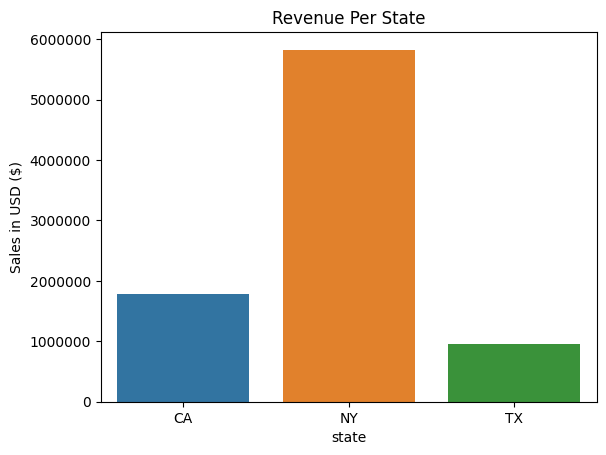

In [10]:
stateResults = df.groupby("state").sum().reset_index()

plt.ticklabel_format(style='plain')
sns.barplot(data=stateResults, x="state", y="revenue").set_title("Revenue Per State"); #used seaborn 
plt.ylabel('Sales in USD ($)');

### Question 4: Which store earned the most revenue? How much was earned? 

In [11]:
df.groupby("store_name").sum()

,order_id,total_units,revenue
store_name,,,
Baldwin Bikes,2586231,4779,5826242.21
Rowlett Bikes,434404,783,962600.76
Santa Cruz Bikes,857380,1516,1790145.91


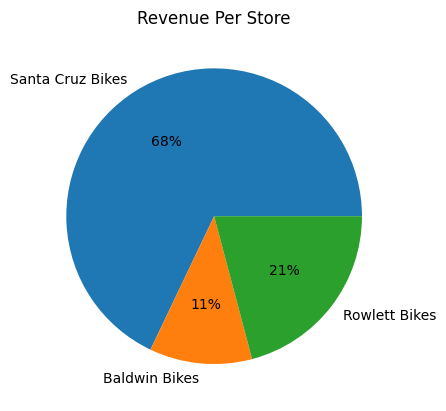

In [12]:
storeResults = df.groupby("store_name").sum()
storeNames = df["store_name"].unique()

plt.title("Revenue Per Store")
plt.pie(storeResults["revenue"], labels = storeNames, autopct='%1.f%%');

### Question 5: Which brand earned the most revenue? How much was earned?

In [27]:
df.groupby("brand_name").revenue.sum().nlargest(9).reset_index()

,brand_name,revenue
0,Trek,5129381.61
1,Electra,1344143.79
2,Surly,1063135.82
3,Sun,381919.69
4,Haro,207096.69
5,Heller,193798.71
6,Pure,166164.00
7,Ritchey,88498.82
8,Strider,4849.75


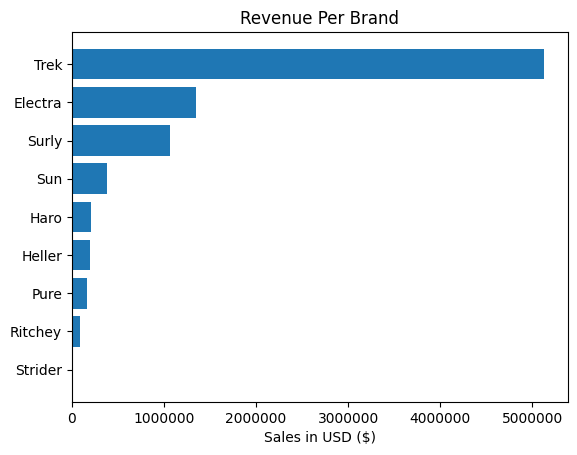

In [29]:
brandResults = df.groupby("brand_name").revenue.sum().nlargest(9).reset_index()

plt.ticklabel_format(style='plain')
plt.title("Revenue Per Brand")
plt.xlabel('Sales in USD ($)')
plt.gca().invert_yaxis()
plt.barh(brandResults["brand_name"], brandResults["revenue"]);

### Question 6: Which product category earned the most revenue? How much was earned?

In [24]:
df.groupby("category_name").revenue.sum().nlargest(7).reset_index()

,category_name,revenue
0,Mountain Bikes,3030775.71
1,Road Bikes,1852555.60
2,Cruisers Bicycles,1109151.04
3,Electric Bikes,1020236.85
4,Cyclocross Bicycles,799874.60
5,Comfort Bicycles,438506.87
6,Children Bicycles,327888.21


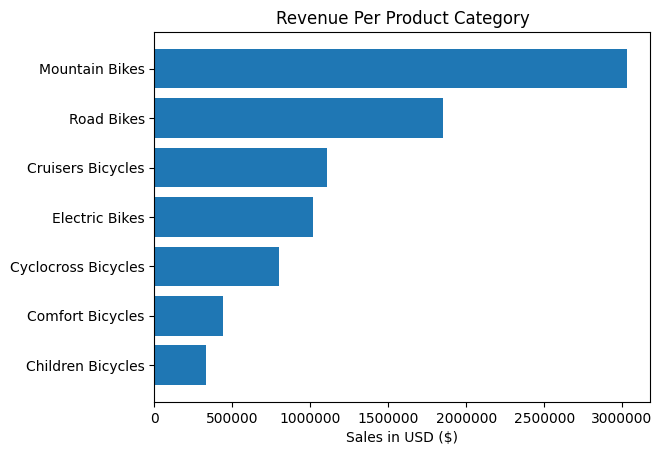

In [25]:
categoryResults = df.groupby("category_name").revenue.sum().nlargest(7).reset_index()

plt.ticklabel_format(style='plain')
plt.title("Revenue Per Product Category")
plt.xlabel('Sales in USD ($)')
plt.gca().invert_yaxis()
plt.barh(categoryResults["category_name"], categoryResults["revenue"]);

### Question 7: Who were our top 10 customers? How much did they spend?

In [17]:
df.groupby("customers").revenue.sum().nlargest(10).reset_index()

,customers,revenue
0,Pamelia Newman,37801.84
1,Abby Gamble,37500.89
2,Sharyn Hopkins,37138.86
3,Lyndsey Bean,35857.86
4,Emmitt Sanchez,34503.82
5,Melanie Hayes,34390.88
6,Debra Burks,30645.87
7,Elinore Aguilar,29661.83
8,Corrina Sawyer,29214.89
9,Shena Carter,27618.95


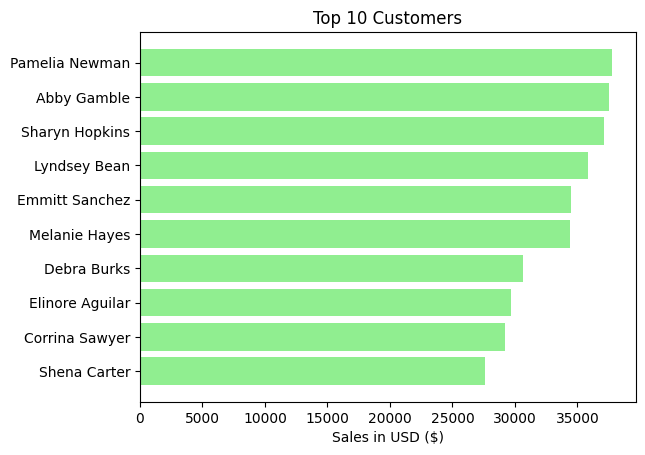

In [30]:
customerResults = df.groupby("customers").revenue.sum().nlargest(10).reset_index()

plt.title("Top 10 Customers")
plt.xlabel('Sales in USD ($)')
plt.gca().invert_yaxis()
plt.barh(customerResults["customers"], customerResults["revenue"], color="lightgreen");

### Question 8: Who were the top sales representatives? How much have money have they made?

In [31]:
df.groupby("sales_rep").revenue.sum().nlargest(6).reset_index()

,sales_rep,revenue
0,Marcelene Boyer,2938888.73
1,Venita Daniel,2887353.48
2,Genna Serrano,952722.26
3,Mireya Copeland,837423.65
4,Kali Vargas,516695.17
5,Layla Terrell,445905.59


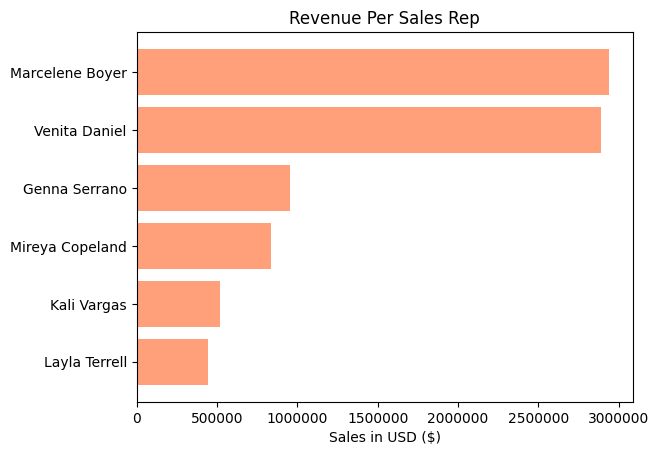

In [41]:
salesRepResults = df.groupby("sales_rep").revenue.sum().nlargest(10).reset_index()

plt.ticklabel_format(style='plain')
plt.title("Revenue Per Sales Rep")
plt.xlabel('Sales in USD ($)')
plt.gca().invert_yaxis()
plt.barh(salesRepResults["sales_rep"], salesRepResults["revenue"], color="lightsalmon");